In [6]:
import pandas as pd
import numpy as np
import re
#import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("pokemon_data.csv")
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [7]:
len(df)

800

In [8]:
df.shape

(800, 12)

Describing the function shows that max # on the Pokedex is 721, which indicates that there are not 800 unique pokemon, but that there are duplicates. These duplicates could be mega forms of the same pokemon.

In [9]:
df.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


There are 721 unique pokedex numbers as inferred from the description

In [10]:
unique_pokemon = df["#"].nunique()
unique_pokemon

721

Finding the difference to show the repeating Pokemon from the unique pokemon shows that there are 79 pokemon that repeat.

In [11]:
repeat_pokemon = len(df) - unique_pokemon
repeat_pokemon

79

In [12]:
df["#"].duplicated().head()

0    False
1    False
2    False
3     True
4    False
Name: #, dtype: bool

Pulling duplicated podex numbers and looking at the head shows that there are mega evolutions making up the duplicated entries. But does this indicate that they are all megas? There could be errors as well.

In [13]:
duplicates_df = df[df["#"].duplicated()]
duplicates_df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,79,103,120,135,115,78,1,False
19,15,BeedrillMega Beedrill,Bug,Poison,65,150,40,15,80,145,1,False


In [14]:
duplicates_df.count()

#             79
Name          79
Type 1        79
Type 2        64
HP            79
Attack        79
Defense       79
Sp. Atk       79
Sp. Def       79
Speed         79
Generation    79
Legendary     79
dtype: int64

Showing the head following removing duplicates appears to show a clean pokedex without mega evolutions

In [15]:
df1 = df.drop_duplicates(subset = ["#"], keep = "first")
df1.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,NaN,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,NaN,79,83,100,85,105,78,1,False
13,10,Caterpie,Bug,NaN,45,30,35,20,20,45,1,False


In [16]:
df1.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,361.00000,68.380028,75.124827,70.697642,68.848821,69.180305,65.714286,3.323162
std,208.27906,25.848272,29.070335,29.194941,28.898590,26.899364,27.277920,1.669873
min,1.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000
25%,181.00000,50.000000,54.000000,50.000000,45.000000,50.000000,45.000000,2.000000
50%,361.00000,65.000000,75.000000,65.000000,65.000000,65.000000,65.000000,3.000000
75%,541.00000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000
max,721.00000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000


However counting megas by name shows that there are 50 mega evolutions in the dataset, especially when relying on the pokedex number so that means there are 29 pokedex numbers that repeat that are not megas.

In [17]:
megas_df = df.loc[df["Name"].str.contains("mega", flags = re.I, regex = True)]
megas_df.count()

#             50
Name          50
Type 1        50
Type 2        40
HP            50
Attack        50
Defense       50
Sp. Atk       50
Sp. Def       50
Speed         50
Generation    50
Legendary     50
dtype: int64

It should be noted that there are 50 pokemon with "Mega" in their name and adding a space "Mega " holds the pattern seen in the dataset to prevent pokemon with "mega-" in their names from being displayed too. So two get removed.

In [18]:
megas_df = df.loc[df["Name"].str.contains("mega ", flags = re.I, regex = True)]
megas_df.count()

#             48
Name          48
Type 1        48
Type 2        39
HP            48
Attack        48
Defense       48
Sp. Atk       48
Sp. Def       48
Speed         48
Generation    48
Legendary     48
dtype: int64

Removing duplicates of names, shows that there are 31 pokemon without a mega title in the duplicates dataset.

In [19]:
megas_df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,79,103,120,135,115,78,1,False
19,15,BeedrillMega Beedrill,Bug,Poison,65,150,40,15,80,145,1,False


In [20]:
not_megas_df = duplicates_df.loc[~duplicates_df["Name"].str.contains("mega ", flags = re.I, regex = True)]
not_megas_df.count()

#             31
Name          31
Type 1        31
Type 2        25
HP            31
Attack        31
Defense       31
Sp. Atk       31
Sp. Def       31
Speed         31
Generation    31
Legendary     31
dtype: int64

In [21]:
megas_df.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,48.000000,48.00000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,259.062500,78.25000,126.229167,106.125000,113.395833,99.375000,94.166667,2.458333
std,158.088907,15.84835,34.631335,37.043749,42.368063,18.586915,35.378400,1.219667
min,3.000000,50.00000,50.000000,40.000000,15.000000,60.000000,20.000000,1.000000
25%,139.000000,68.00000,100.000000,80.000000,77.500000,85.000000,75.000000,1.000000
50%,271.000000,78.00000,131.000000,100.000000,120.000000,98.000000,100.000000,3.000000
75%,364.750000,90.00000,150.000000,120.000000,141.250000,111.250000,115.000000,3.000000
max,719.000000,108.00000,190.000000,230.000000,194.000000,150.000000,150.000000,6.000000


These pokemon naturally come in various forms.

In [22]:
not_megas_df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
422,382,KyogrePrimal Kyogre,Water,NaN,100,150,90,180,160,90,3,True
424,383,GroudonPrimal Groudon,Ground,Fire,100,180,160,150,90,90,3,True
429,386,DeoxysAttack Forme,Psychic,NaN,50,180,20,180,20,150,3,True
430,386,DeoxysDefense Forme,Psychic,NaN,50,70,160,70,160,90,3,True
431,386,DeoxysSpeed Forme,Psychic,NaN,50,95,90,95,90,180,3,True
459,413,WormadamSandy Cloak,Bug,Ground,60,79,105,59,85,36,4,False
460,413,WormadamTrash Cloak,Bug,Steel,60,69,95,69,95,36,4,False
532,479,RotomHeat Rotom,Electric,Fire,50,65,107,105,107,86,4,False
533,479,RotomWash Rotom,Electric,Water,50,65,107,105,107,86,4,False
534,479,RotomFrost Rotom,Electric,Ice,50,65,107,105,107,86,4,False


Graphing the pokemon that are not megas but have different forms show that higher numbers of pokemon with various forms are from later generations since their pokedex number is 400 and above and the frequency of pokemon with more forms appears to grow in the highest, and therefore, latest entries.

<AxesSubplot:xlabel='#', ylabel='Name'>

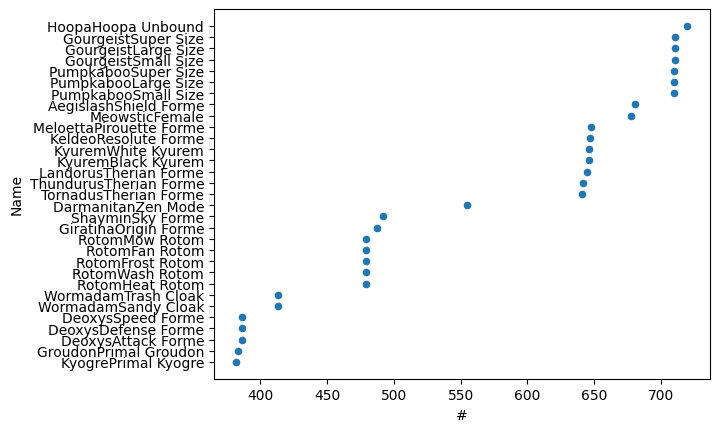

In [23]:
not_megas_df.plot.scatter(x="#", y="Name")

While looking at the distribution of mega evolutions we see a fairly even distribution over the pokedex entries meaning that mega evolutions are spread fairly evenly among generations than pokemon with various natural forms.

<AxesSubplot:xlabel='#', ylabel='Name'>

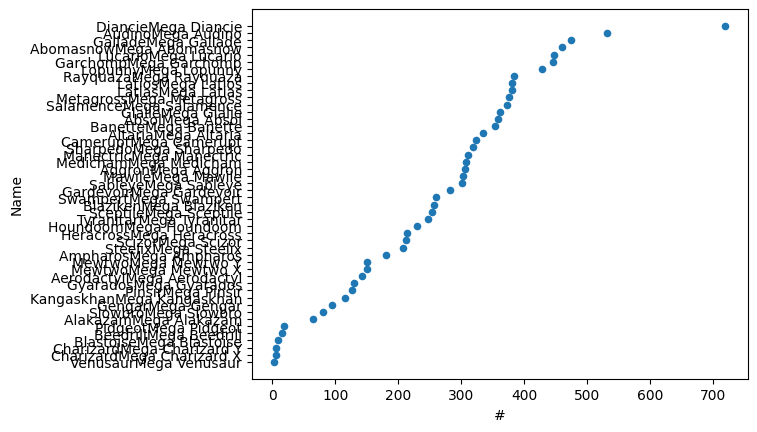

In [24]:
megas_df.plot.scatter(x="#", y="Name")

The increasing number of changes to later generations raises the question of whether there is an increase in the number of pokemon released in later generations or if it was decreased and extra forms were created instead. The graph below visually demonstrates a continual growth in the number of pokemon and a roughly equal number of pokemon in each generation.

<AxesSubplot:xlabel='Generation', ylabel='#'>

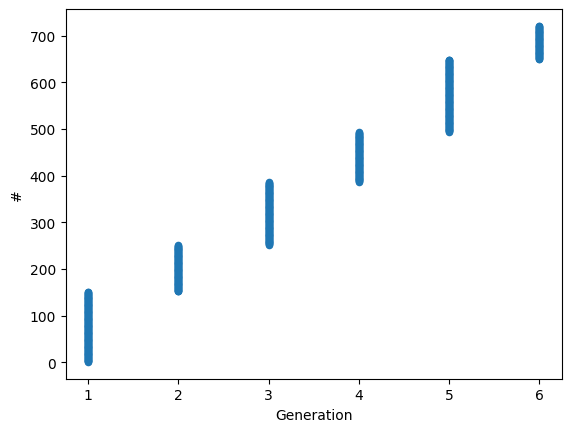

In [25]:
generation_num = df1.plot.scatter(x="Generation", y = "#")
generation_num

In [26]:
trend = 

SyntaxError: invalid syntax (2979551487.py, line 1)

In [27]:
gen_count = df1["Generation"].value_counts().sort_index()
gen_count

1    151
2    100
3    135
4    107
5    156
6     72
Name: Generation, dtype: int64

<AxesSubplot:>

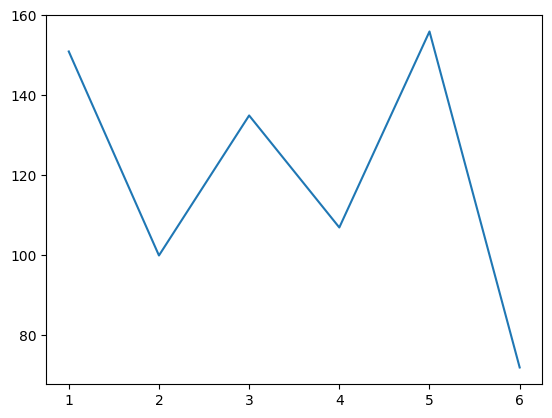

In [28]:
gen_count.plot.line()